In [31]:
# draw results

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale=1.3)

In [2]:
rolling_frame = 100
steps = 2000
frame_size = 1
env_path = ''
logs_path = env_path + 'results/'
figure_path = env_path + 'figures/'
# logs_path = env_path + 'logs/' + sub_name
file_names = ['Results_Sim4_1_1_updated_base.csv', 'Results_Sim5_1_1_updated_base.csv', 'Results_Sim6_1_1_updated_base.csv']
labels = ['Share-all', 'Share-rules', 'Exanna']
# colors = np.array(['tab:green', 'tab:red', 'tab:blue', 'yellow'])
colors = ['tab:green', 'tab:red', 'tab:blue', 'purple', 'orange', 'maroon', 'cyan', 'brown', 'pink', 'gray', 'aqua', 'lightcoral', 'olive', 'coral', 'tab:blue', 'blue']

In [3]:
dataframes = []
for idx in range(len(file_names)):
    dataframe = pd.read_csv(logs_path + file_names[idx])
    dataframes.append(dataframe)

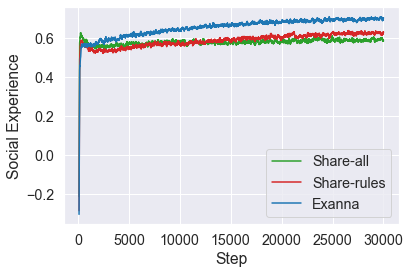

In [35]:
attribute = 'Payoff_Per_Interaction'
# for idx, file_name in enumerate(file_names):
#     dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
#     dataframes[idx][attribute].plot(color=colors[idx])

fig, ax = plt.subplots()
ax.set(xlabel = 'Step', ylabel = 'Social Experience')
   
for idx in range(len(file_names)):
#     agent_payoff_label = agent_payoff_labels[agentId]
#     df[agent_payoff_label].plot(color=colors[agentId])
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()
plt.savefig(figure_path + "Social_Experience.pdf", format="pdf", bbox_inches="tight")
plt.show()


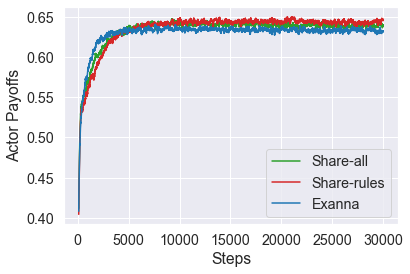

In [36]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Actor_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

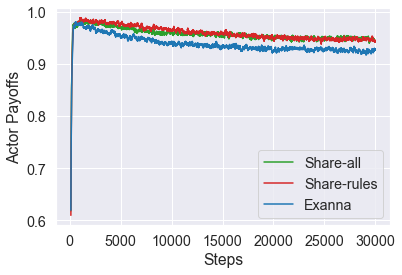

In [37]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Actor_Payoff_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Actor Payoffs')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#         dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Actor_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

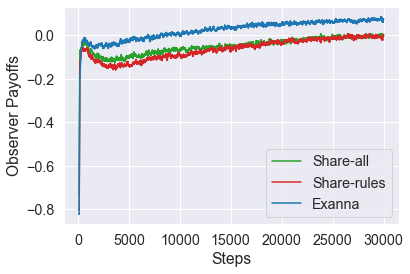

In [38]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Observer_Payoffs_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

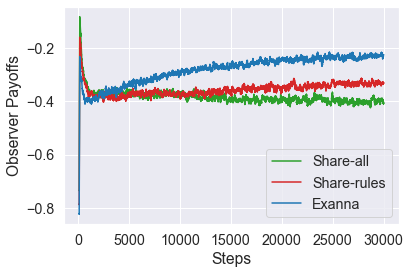

In [39]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Expected_Observer_Payoff_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Observer Payoffs')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Observer_Payoffs_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

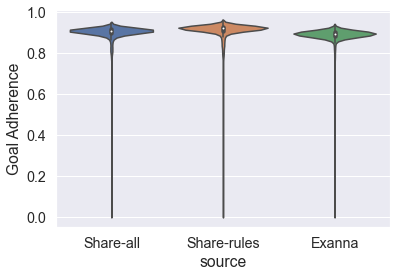

In [40]:
attribute = 'Satisfaction_Per_Interaction'

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

dataframe = pd.DataFrame()
for idx in range(len(file_names)):
    arr = [labels[idx] for i in range(len(dataframes[idx]))]
    dataframes[idx]['source'] = arr
    dataframe = pd.concat([dataframe, dataframes[idx]])

sns_plot = sns.violinplot(x=dataframe.source, y=dataframe[attribute], data=dataframe, cut = 0)
sns_plot.set_ylabel("Goal Adherence")
# sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
# sns_plot = sns.swarmplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Adherence_Per_Interaction_violinplot.pdf", bbox_inches='tight')

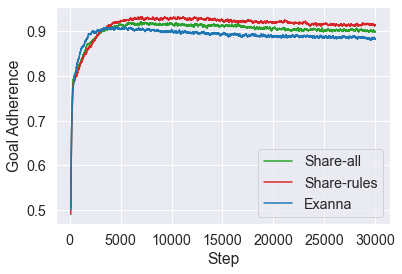

In [41]:
attribute = 'Satisfaction_Per_Interaction'
# for idx, file_name in enumerate(file_names):
#     dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
#     dataframes[idx][attribute].plot(color=colors[idx])

fig, ax = plt.subplots()
ax.set(xlabel = 'Step', ylabel = 'Goal Adherence')
   
for idx in range(len(file_names)):
#     agent_payoff_label = agent_payoff_labels[agentId]
#     df[agent_payoff_label].plot(color=colors[agentId])
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()
plt.savefig(figure_path + "Adherence_Per_Interaction.pdf", format="pdf", bbox_inches="tight")
plt.show()


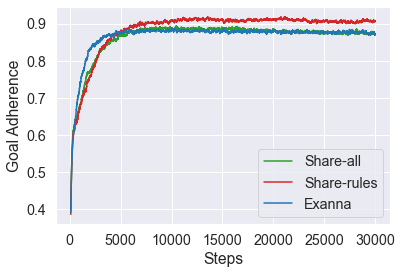

In [42]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'health':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Agent_Goal_Adherence_health.pdf", format="pdf", bbox_inches="tight")
plt.show()

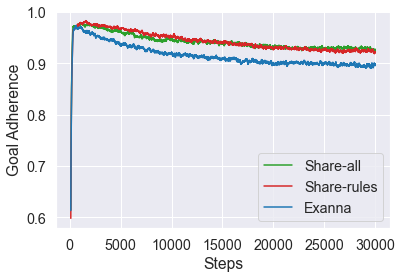

In [4]:
agent_types = ['health', 'freedom']
agent_labels = np.array(["Satisfaction_for_{}_agents".format(x) for x in agent_types])

fig, ax = plt.subplots()
ax.set(xlabel = 'Steps', ylabel = 'Goal Adherence')

for idx in range(len(file_names)):   
    for agentId in range(len(agent_types)):
        agent_label = agent_labels[agentId]
        if agent_types[agentId] == 'freedom':
            show_label = labels[idx] # + ": " + agent_types[agentId]
            dataframes[idx][agent_labels[agentId]] = dataframes[idx][agent_labels[agentId]].rolling(rolling_frame).mean()
#             dataframes[idx][agent_labels[agentId]].plot(color=colors[idx * 2 + agentId], label=show_label)
            dataframes[idx][agent_labels[agentId]].plot(color=colors[idx], label=show_label)

ax.legend()
plt.savefig(figure_path + "Agent_Goal_Adherence_freedom.pdf", format="pdf", bbox_inches="tight")
plt.show()

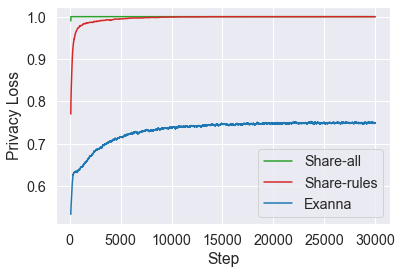

In [44]:
# attribute = 'Avg_information_cost'
attribute = 'Avg_privacy_loss'
# for idx, file_name in enumerate(file_names):
#     dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
#     dataframes[idx][attribute].plot(color=colors[idx])

fig, ax = plt.subplots()
ax.set(xlabel = 'Step', ylabel = 'Privacy Loss')
   
for idx in range(len(file_names)):
#     agent_payoff_label = agent_payoff_labels[agentId]
#     df[agent_payoff_label].plot(color=colors[agentId])
    dataframes[idx][attribute] = dataframes[idx][attribute].rolling(rolling_frame).mean()
    dataframes[idx][attribute].plot(color=colors[idx], label=labels[idx])

ax.legend()
# plt.savefig(figure_path + "Step_Privacy_Loss.pdf", format="pdf", bbox_inches="tight")
plt.show()


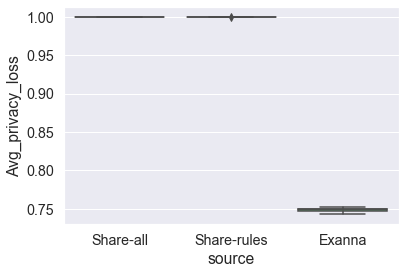

In [45]:
attribute = 'Avg_privacy_loss'

dataframe = pd.read_csv(logs_path + 'Summary.csv')

# sns_plot = sns.violinplot(x=dataframe.source, y=dataframe[attribute], data=dataframe, cut = 0)
sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
# sns_plot = sns.swarmplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Privacy_loss.pdf", bbox_inches='tight')

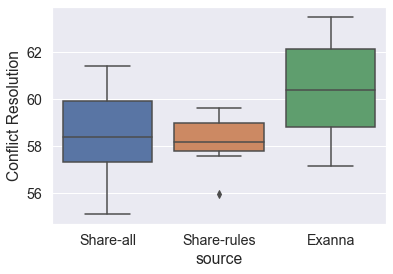

In [48]:
attribute = 'resolution'

dataframe = pd.read_csv(logs_path + 'Summary.csv')

# sns_plot = sns.violinplot(x=dataframe.source, y=dataframe[attribute], data=dataframe, cut = 0)
sns_plot = sns.boxplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
# sns_plot = sns.swarmplot(data=dataframe, x=dataframe.source, y=dataframe[attribute])
sns_plot.set(ylabel = 'Conflict Resolution')
fig = sns_plot.get_figure()
fig.savefig(figure_path + "Conflict_resolution.pdf", bbox_inches='tight')
